In [3]:
import moviepy as mp

video = mp.VideoFileClip("../data/train_data/549b8ef4fdf99b4ffa5fa0c9_q2_generic.mp4")
video

In [4]:
frames = [frame for frame in video.iter_frames()]
frames[0]

array([[[ 81,  95,  91],
        [ 81,  95,  91],
        [ 81,  95,  91],
        ...,
        [ 72,  71,  60],
        [ 72,  71,  60],
        [ 72,  71,  60]],

       [[ 81,  95,  91],
        [ 81,  95,  91],
        [ 81,  95,  91],
        ...,
        [ 72,  71,  60],
        [ 72,  71,  60],
        [ 72,  71,  60]],

       [[ 83,  97,  93],
        [ 83,  97,  93],
        [ 83,  97,  93],
        ...,
        [ 72,  71,  60],
        [ 72,  71,  60],
        [ 72,  71,  60]],

       ...,

       [[113, 133, 136],
        [113, 133, 136],
        [113, 133, 136],
        ...,
        [217, 184, 177],
        [213, 180, 173],
        [209, 176, 169]],

       [[113, 133, 136],
        [113, 133, 136],
        [113, 133, 136],
        ...,
        [218, 185, 178],
        [215, 182, 175],
        [212, 179, 172]],

       [[113, 133, 136],
        [113, 133, 136],
        [113, 133, 136],
        ...,
        [219, 186, 179],
        [216, 183, 176],
        [212, 179, 172]]

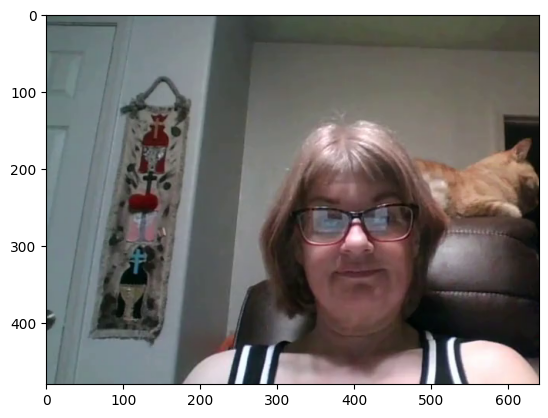

In [5]:
import matplotlib.pyplot as plt

plt.imshow(frames[0])

In [6]:
from facenet_pytorch import MTCNN

mtcnn = MTCNN(
    image_size=224,
    min_face_size=50,
    device="cpu",
    selection_method="largest",
)

In [ ]:
from torch import Tensor
from jaxtyping import Float

batch_size = 128
for idx in range(0, len(frames), batch_size):
    batch_frames = frames[idx : idx + batch_size]

    try:
    batch_cropped_frames: list[Float[Tensor, "channel height width"]] = (  # noqa: F722
        mtcnn(batch_frames)
    )

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (128,) + inhomogeneous part.

In [44]:
import torch
from types import NoneType


def plot_with_face(frame):
    face = mtcnn(frame)

    fig, ax = plt.subplots(1, 2, figsize=(15, 8))
    ax[0].imshow(frame)

    if not isinstance(face, NoneType):
        ax[1].imshow(face.permute(1, 2, 0))

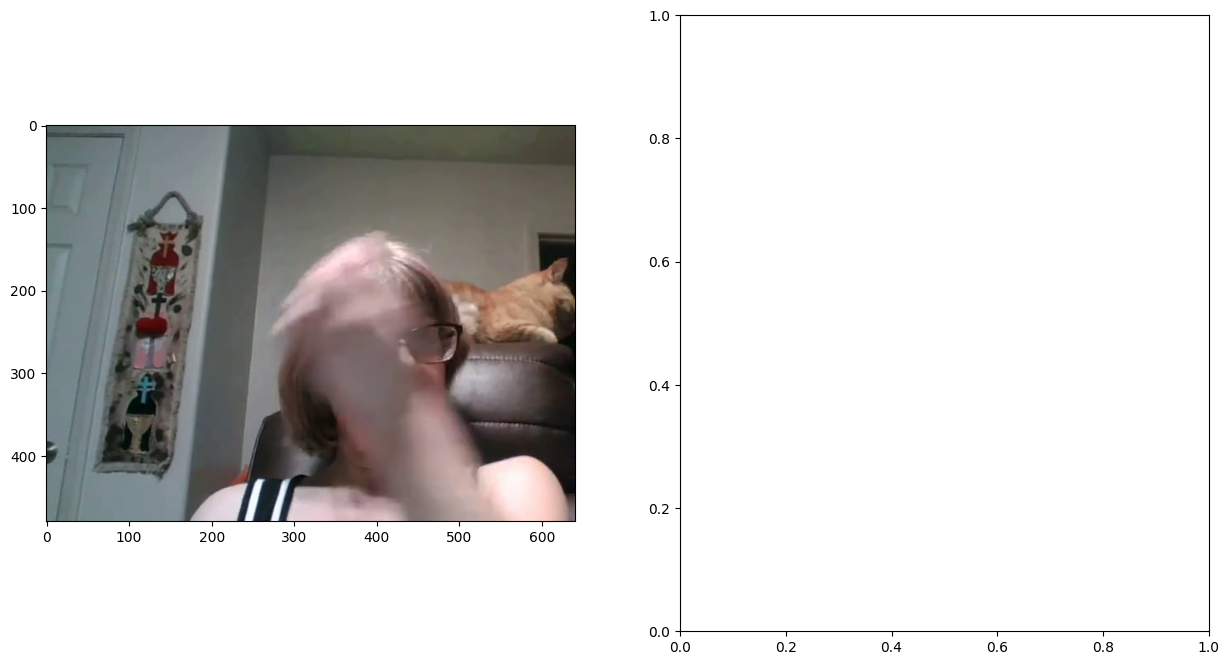

In [45]:
plot_with_face(batch_frames[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.98046875..0.99609375].


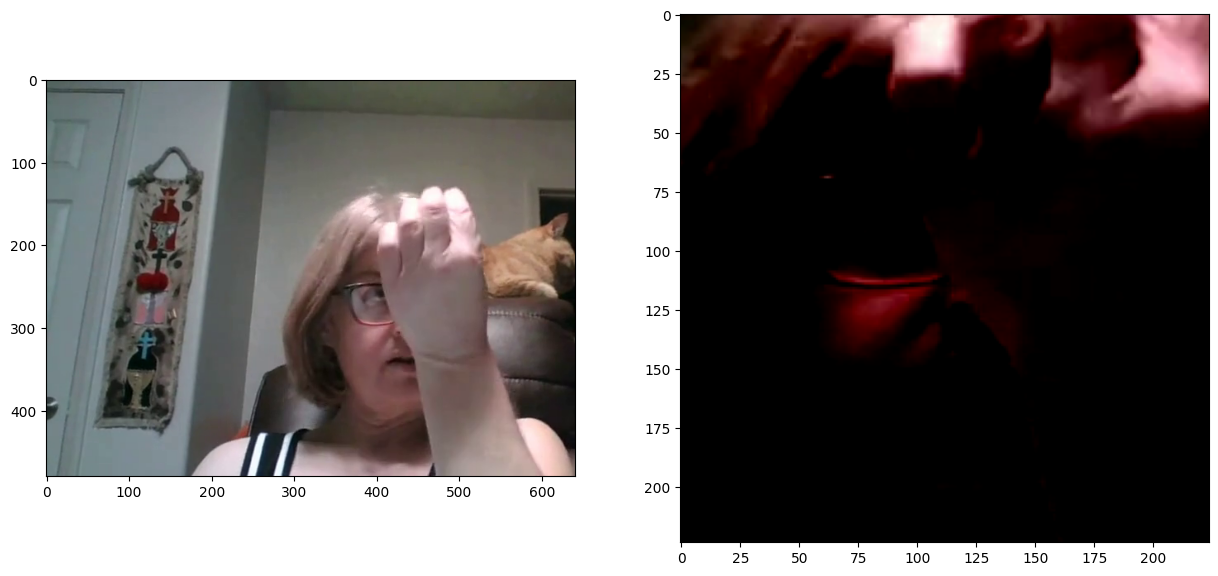

In [46]:
plot_with_face(batch_frames[10])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99609375..0.99609375].


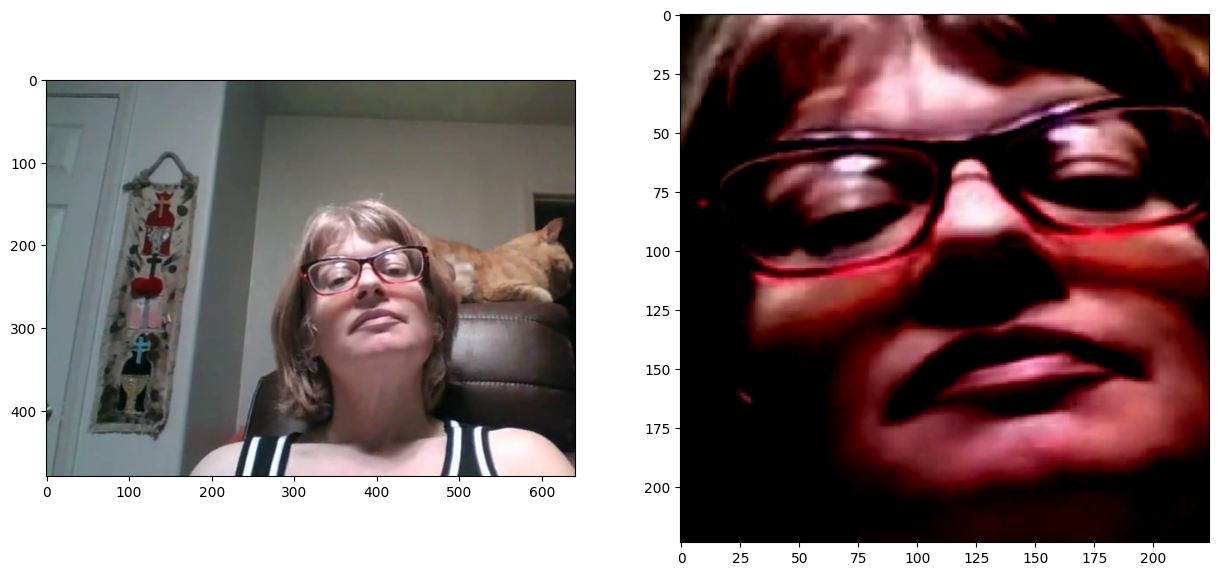

In [47]:
plot_with_face(batch_frames[100])

In [ ]:
face = mtcnn(batch_frames[100])
face.size()

torch.Size([3, 224, 224])

In [51]:
from torch import Tensor
from jaxtyping import Float

batch_size = 128
for idx in range(0, len(frames), batch_size):
    batch_frames = frames[idx : idx + batch_size]

    try:
        batch_cropped_frames: list[Float[Tensor, "channel height width"]] = mtcnn(
            batch_frames
        )
    except ValueError:
        batch_cropped_frames = []

        for batch_frame in batch_frames:
            cropped_frame = mtcnn(batch_frame)

            if isinstance(cropped_frame, NoneType):
                batch_cropped_frames.append(torch.zeros(3, 224, 224))
            else:
                batch_cropped_frames.append(cropped_frame)